# Predicting Loan Default Risk Using Logistic Regression with Imbalanced Dataset Handling

In the financial services industry, predicting loan default risk is critical for minimizing losses and maintaining a healthy credit portfolio. As a data scientist working for a bank, you have been tasked with building a model to predict whether a customer will default on their loan. The dataset contains several features such as CustomerID, Income, LoanAmount, CreditScore, and Age, with the target variable being Default (1 indicating default, 0 indicating no default).

Your goals for this project are:

1. Build a Logistic Regression Model: Train a logistic regression model to predict whether a customer will default on their loan based on the provided features.
2. Dataset Evaluation: Analyze the dataset to check for any class imbalance (i.e., whether there are significantly more non-default cases than default cases). Visualize the class distribution and assess the imbalance.
3. Handle Imbalanced Data: If the dataset is found to be imbalanced, use the SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. Train a new logistic regression model on the balanced dataset.
4. Model Evaluation: For both the original and balanced datasets, evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Generate confusion matrix plots for visual comparison.


By the end of the project, you should have a well-performing model capable of identifying customers at risk of defaulting, which can be used by the bank to make informed lending decisions and minimize financial risks. The evaluation metrics will help in comparing the performance of the model before and after balancing the dataset.

In [1]:
print("Hello, Begin Your Data Journey")


Hello, Begin Your Data Journey


In [3]:
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install seaborn
!pip3 install imblearn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 258 kB 772 kB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
jupyter_notebook_dataset = os.getenv("dataset_url", "https://d3dyfaf3iutrxo.cloudfront.net/general/upload/19b1a8607dd64cb793aea1a3aa349d79.csv")
df = pd.read_csv(jupyter_notebook_dataset)


In [5]:
# Display the first 5 rows of the dataset to understand its structure
df.head()


,CustomerID,Income,LoanAmount,CreditScore,Age,Default
0,1,141958,18216,819,31,1
1,2,35795,40547,326,26,0
2,3,20860,36471,498,36,0
3,4,123694,22308,686,64,0
4,5,148106,32532,648,69,0


In [6]:
# Generate summary statistics (mean, standard deviation, min, max) for numeric columns

df.describe()


,CustomerID,Income,LoanAmount,CreditScore,Age,Default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,85838.794000,26972.814000,577.345000,44.030000,0.10000
std,288.819436,37817.509802,12858.287551,156.649945,14.787825,0.30015
min,1.000000,20206.000000,5009.000000,300.000000,18.000000,0.00000
25%,250.750000,53567.250000,15789.000000,444.000000,31.000000,0.00000
50%,500.500000,86399.500000,26544.500000,577.500000,45.000000,0.00000
75%,750.250000,117864.000000,38542.250000,707.500000,57.000000,0.00000
max,1000.000000,149981.000000,49923.000000,849.000000,69.000000,1.00000


In [7]:
# Check the data types of each column and whether there are any categorical columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   Income       1000 non-null   int64
 2   LoanAmount   1000 non-null   int64
 3   CreditScore  1000 non-null   int64
 4   Age          1000 non-null   int64
 5   Default      1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


In [8]:
# Check for any missing values in the dataset
df.isnull().sum()


CustomerID     0
Income         0
LoanAmount     0
CreditScore    0
Age            0
Default        0
dtype: int64

In [9]:
# Check the distribution of the target variable (Default column) to identify if the dataset is imbalanced
df['Default'].value_counts()




Default
0    900
1    100
Name: count, dtype: int64

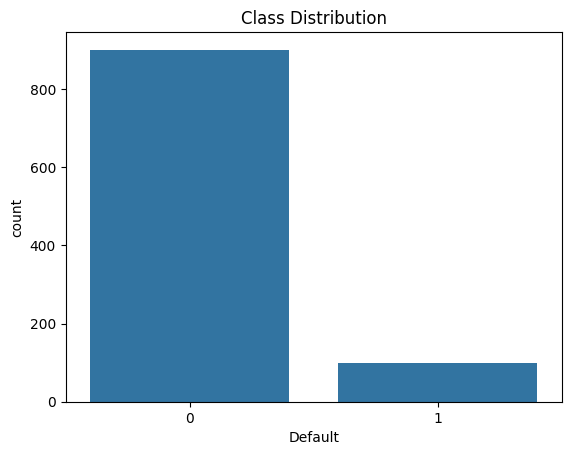

In [10]:
# Visualize the class distribution using a countplot to see if the data is imbalanced
sns.countplot(x='Default', data=df)
plt.title('Class Distribution')
plt.show()


In [11]:
# Define features (X) and target (y) for the model
data = df
X = data.drop(columns=['CustomerID', 'Default'])
y = data['Default']



In [12]:
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [13]:
# Initialize the logistic regression model
model = LogisticRegression()


In [14]:
# Train (fit) the logistic regression model using the training data
model.fit(X_train, y_train)



LogisticRegression()

In [15]:
# Use the trained model to predict the target variable on the test set
# and store it in a variable 'y_pred'
y_pred = model.predict(X_test)



In [16]:
# Evaluation Metrics: Calculate the confusion matrix and store it in a variable 'conf_matrix'
conf_matrix = confusion_matrix(y_test, y_pred)


In [17]:
# Calculate precision, recall, and F1 score 
# and store it in a variable 'precision' , 'recall' & 'f1' respectively 
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)


In [18]:
# Calculate and display the accuracy score and store it in a variable 'accuracy'
def get_accuracy():  
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy  # replace with actual accuracy


In [19]:
accuracy = get_accuracy()
accuracy


0.9

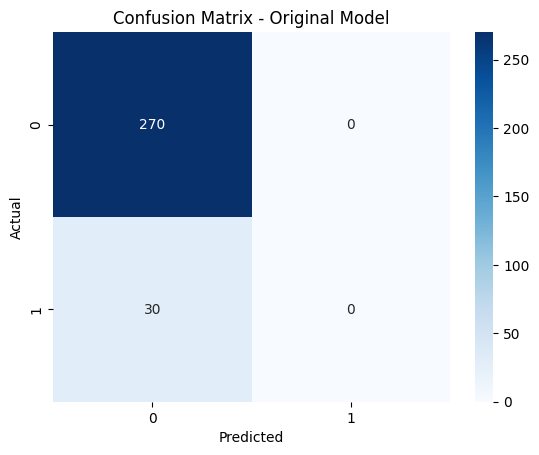

In [20]:
# Visualize the confusion matrix using a heatmap for easier interpretation
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Original Model')
plt.show()



In [21]:
# If the dataset is imbalanced, apply SMOTE (Synthetic Minority Over-sampling Technique)
# Initialize SMOTE and resample the training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)



/Users/preetyrai/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


/Users/preetyrai/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


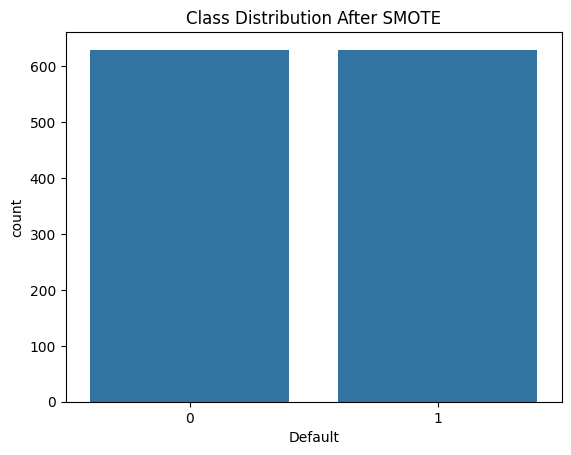

In [22]:
# Check the new class distribution after resampling to confirm the data is balanced
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


sns.countplot(x=y_train_bal)
plt.title('Class Distribution After SMOTE')
plt.show()


In [23]:
# Train a new logistic regression model on the balanced dataset
model_bal = LogisticRegression()
model_bal.fit(X_train_bal, y_train_bal)


LogisticRegression()

In [24]:
# Use the balanced model to predict the target variable on the test set and store it in a variable 'y_pred_bal'
y_pred_bal = model_bal.predict(X_test)


In [25]:
# Calculate the accuracy for the balanced model and store it in a variable 'accuracy_bal'
def get_accuracy():  
    accuracy_bal = accuracy_score(y_test, y_pred_bal)
    return accuracy_bal  # replace with actual accuracy


In [26]:
accuracy_bal = get_accuracy()
accuracy_bal


0.4866666666666667

In [28]:
0.5466666666666666
# Calculate precision, recall, and f1 score for the balanced model without using classification_report
# and store it in a variable 'new_precision' , 'new_recall' & 'new_f1' respectively 
new_precision = precision_score(y_test, y_pred_bal, zero_division=1)
new_recall = recall_score(y_test, y_pred_bal, zero_division=1)
new_f1 = f1_score(y_test, y_pred_bal, zero_division=1)



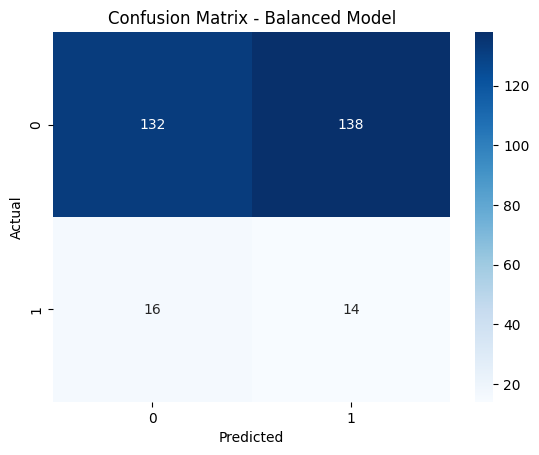

In [29]:
# Visualize the confusion matrix for the balanced model

conf_matrix_bal = confusion_matrix(y_test, y_pred_bal)
sns.heatmap(conf_matrix_bal, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Balanced Model')
plt.show()


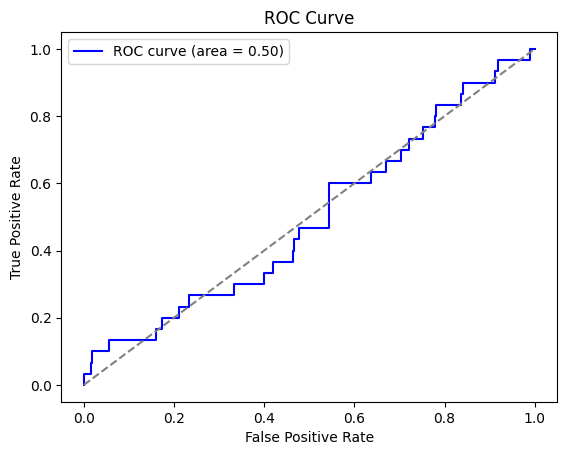

In [30]:
# Plot the ROC curve to evaluate the model's ability to distinguish between the classes

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model_bal.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
